### Exp-10: Gaussian Process Regression, Confidence interval, Prediction interval

- (a) GPR for artificial dataset, y=x sin(x)
- (b) GPR for real-world dataset (any)

#### (a) GPR for artificial dataset, y=x sin(x)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import math,time

In [59]:
noise=1
len_scale=2.5

In [60]:
def kernal_function(x1,x2,len_scale):
    dist_sq=np.linalg.norm(x1-x2)**2
    term=-1/(2*len_scale**2)
    return noise*np.exp(dist_sq*term)
    

In [61]:
def cov_matrix(x1,x2):
    n=x1.shape[0]
    m=x2.shape[0]
    cov_mat=np.empty((n,m))
    
    for i in range(n):
        for j in range(m):
            cov_mat[i][j]=kernal_function(x1[i],x2[j],len_scale)
    return cov_mat

In [62]:
def GPR_train(trainX,trainY):
    K=cov_matrix(trainX,trainX)
    K_inv=np.linalg.inv(K+noise*np.identity(len(trainX))) #to avoid singularity--> conditionality
    return K,K_inv

In [63]:
def GPR_predict(trainX,trainY,testX):
    K1=cov_matrix(trainX,testX)
    K2=cov_matrix(testX,testX)
    K3=K2-np.matmul(K1.T,np.matmul(K_inv,K1))+noise*np.identity(len(testX)) #identity matrix is a square matrix 
    
    mean_prediction=np.matmul(K1.T,np.matmul(K_inv,trainY))
    std_prediction=np.sqrt(np.diag(K3))
    
    return mean_prediction,std_prediction

In [64]:
#If uncertainity band is large or wider predictions are uncertain:Heteroscedasticity
#for some confidence interval
#confidence interval=100-significance level

In [65]:
trainX=np.linspace(0,10,num=1000)
trainY=trainX*np.sin(trainX)

In [66]:
testX=np.linspace(0,10,num=1000)
testY=testX*np.sin(testX)

In [67]:
print("Training Started")
K,K_inv=GPR_train(trainX,trainY)
print("Training Completed")

Training Started
Training Completed


In [68]:
print("Testing Started")
st=time.time()
mean_prediction,std_prediction=GPR_predict(trainX,trainY,testX)
et=time.time()

Testing Started


Testing time is 9 seconds


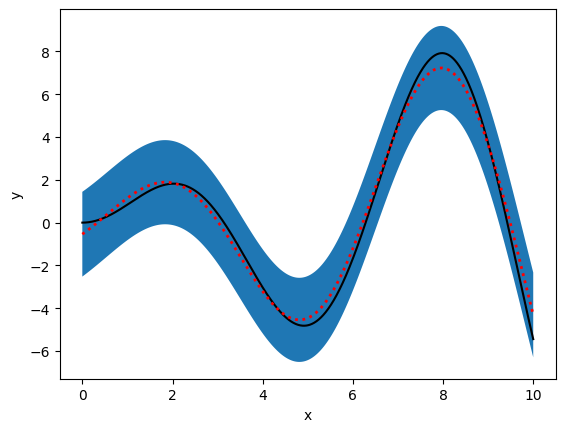

In [69]:
print("Testing time is",round(et-st),'seconds')

plt.plot(testX,testY,color="black")
plt.plot(testX,mean_prediction,ls=':',lw=2,color="red")
plt.fill_between(testX,
                mean_prediction-1.96*std_prediction,
                mean_prediction+1.96*std_prediction,
                label=r"95% confidence interval"
                )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### (b) GPR for real-world dataset (any)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import time
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv("D:\SEM 3\Python for Data Science\\yahoo_stock.csv")  

X = data[["High", "Low", "Open", "Volume"]].values 
y = data["Close"].values 


test_size = 0.2  # 
trainX, testX, trainY, testY = train_test_split(X, y, test_size=test_size, random_state=42)

# GPR parameters
noise = 1
len_scale = 2.5

def kernal_function(x1, x2, len_scale):
    dist_sq = np.linalg.norm(x1 - x2) ** 2
    term = -1 / (2 * len_scale ** 2)
    return noise * np.exp(dist_sq * term)

def cov_matrix(x1, x2):
    n = x1.shape[0]
    m = x2.shape[0]
    cov_mat = np.empty((n, m))
    
    for i in range(n):
        for j in range(m):
            cov_mat[i][j] = kernal_function(x1[i], x2[j], len_scale)
    return cov_mat

def GPR_train(trainX, trainY):
    K = cov_matrix(trainX, trainX)
    K_inv = np.linalg.inv(K + noise * np.identity(len(trainX)))
    return K, K_inv

def GPR_predict(trainX, trainY, testX):
    K1 = cov_matrix(trainX, testX)
    K2 = cov_matrix(testX, testX)
    K3 = K2 - np.matmul(K1.T, np.matmul(K_inv, K1)) + noise * np.identity(len(testX))
    
    mean_prediction = np.matmul(K1.T, np.matmul(K_inv, trainY))
    std_prediction = np.sqrt(np.diag(K3))
    
    return mean_prediction, std_prediction

print("Training Started")
K, K_inv = GPR_train(trainX, trainY)
print("Training Completed")
print("Testing Started")
st = time.time()
mean_prediction, std_prediction = GPR_predict(trainX, trainY, testX)
et = time.time()

print("Testing time is", round(et - st), 'seconds')

Training Started
Training Completed
Testing Started
Testing time is 4 seconds


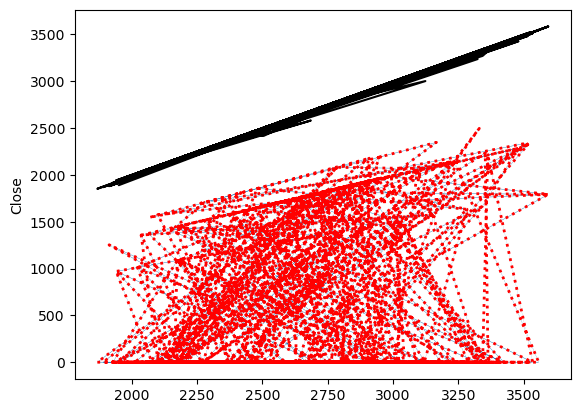

In [9]:
plt.plot(testX[:, 0], testY, color="black") 
plt.plot(testX[:, 0], mean_prediction, ls=':', lw=2, color="red")
plt.fill_between(testX[:, 0],
                mean_prediction - 1.96 * std_prediction,
                mean_prediction + 1.96 * std_prediction,
                label=r"95% confidence interval"
                )
plt.ylabel('Close')  
plt.show()

In [10]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
